# python Class

In [35]:
class Car:
    def __init__(self, color):
        self.color = color

car1 = Car("빨간색")
car2 = Car("보라")

print(car1.color)
print(car2.color)

빨간색
보라


In [36]:
class Car:
    def __init__(self, color):
        self.color = color

    def drive(self):
        print(f"{self.color} 자동차가 달립니다!")

car1 = Car("빨간색")
car2 = Car("보라")

print(car1.color)
print(car2.color)

car1.drive()

빨간색
보라
빨간색 자동차가 달립니다!


## Special Methods in Python Classes

In Python, special methods (also known as "magic methods" or "dunder methods") are methods with double underscores at the beginning and end of their names (e.g., `__init__`, `__str__`, `__len__`). These methods allow you to define how your objects behave with built-in Python operations, such as printing, addition, length calculation, and more.

### Common Special Methods

- `__init__(self, ...)`: Object initializer (constructor).
- `__len__(self)`: Defines behavior for `len(obj)`.
- `__getitem__(self, key)`: Enables bracket indexing (`obj[key]`).
- `__call__(self, ...)`: Makes an object callable like a function.

### Example


In [37]:
class Car:
    def __init__(self, color):
        self.color = color

    def __call__(self, time):
        print(f"{self.color} 자동차가 {time}초 동안 달립니다!")

    def drive(self):
        print(f"{self.color} 자동차가 달립니다!")

car1 = Car("빨간색")
car2 = Car("보라")

print(car1.color)
print(car2.color)

car1.drive()

car2(10)

빨간색
보라
빨간색 자동차가 달립니다!
보라 자동차가 10초 동안 달립니다!


In [39]:
class Car:
    def __init__(self, color):
        self.color = color

    def __call__(self, time):
        print(f"{self.color} 자동차가 {time}초 동안 달립니다!")

    def __len__(self):
        return len(self.color)

    def drive(self):
        print(f"{self.color} 자동차가 달립니다!")

car1 = Car("빨간색")
car2 = Car("보라")

car1.drive()

car2(10)

len(car1)

빨간색 자동차가 달립니다!
보라 자동차가 10초 동안 달립니다!


3

# B&W convert

In [17]:
from PIL import Image
import os

# 이미지 경로
img_path = 'day1/imagenet_cab.JPEG'

# 이미지 불러오기
image = Image.open(img_path)

# 흑백 변환
bw_image = image.convert('L')

# 저장 경로
bw_output_path = os.path.splitext(img_path)[0] + '_bw' + os.path.splitext(img_path)[1]
bw_image.save(bw_output_path)


# kernel 5x5 blur

In [ ]:
import torch

import torch.nn as nn

class BlurModel(nn.Module):
    def __init__(self, kernel_size=5):
        super(BlurModel, self).__init__()
        self.kernel_size = kernel_size
        self.conv = nn.Conv2d(
            in_channels=1,
            out_channels=1,
            kernel_size=64,
            stride=1,
            padding=kernel_size // 2,
            bias=False
        )
        # 커널을 고정된 값으로 설정
        with torch.no_grad():
            self.conv.weight[:] = 1.0 / (kernel_size * kernel_size)

    def forward(self, x):
        return self.conv(x)

# 모델 초기화
blur_model = BlurModel(kernel_size=5)

# 이미지 데이터를 3채널로 분리
image_tensor = torch.from_numpy(image_np).permute(2, 0, 1).unsqueeze(1).float() / 255.0  # (C, H, W) -> (C, 1, H, W)

# 각 채널에 대해 블러 적용
blurred_channels = []
for channel in image_tensor:
    blurred_channel = blur_model(channel.unsqueeze(0))  # (1, 1, H, W)
    blurred_channels.append(blurred_channel.squeeze(0))  # (1, H, W)

# 블러 처리된 채널을 결합
blurred_tensor = torch.cat(blurred_channels, dim=0).permute(1, 2, 0)  # (H, W, C)

# 텐서를 numpy로 변환
blurred_np = (blurred_tensor.detach().numpy() * 255).astype(np.uint8)
blurred_image = Image.fromarray(blurred_np)

# 저장 경로
output_path = 'day1/imagenet_cab_blur_nn.JPEG'
blurred_image.save(output_path)


# function png

In [4]:
import matplotlib.pyplot as plt

# 그림과 축 생성
fig, ax = plt.subplots(figsize=(4, 2))

# 흰색 수식 텍스트 추가
ax.text(0.5, 0.5, r'$\text{loss} = (Y - X)^2$', color='white', fontsize=24, ha='center', va='center')

# 배경색을 검정색으로 설정
ax.set_facecolor('black')

# 축 숨기기
ax.axis('off')

# PNG로 저장
plt.savefig('loss_equation.png', bbox_inches='tight', pad_inches=0.1, transparent=False)
plt.close(fig)


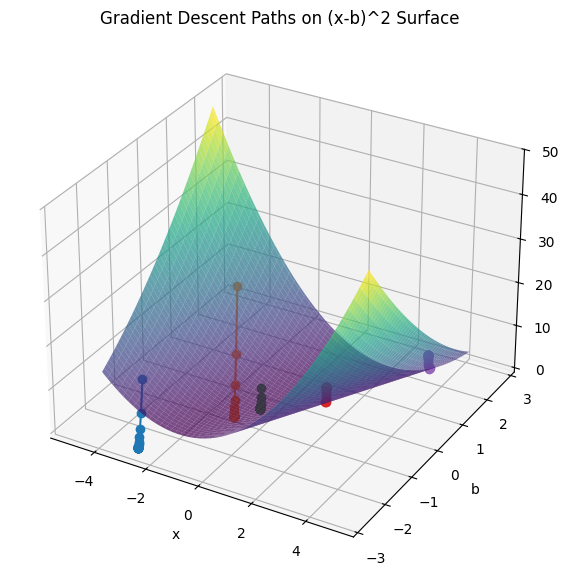

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 예시 데이터 생성
m, n = 100, 100
x = np.linspace(-5, 5, m).reshape(-1, 1) + np.zeros((m, n))
b = np.linspace(-2, 2, n).reshape(1, -1) + np.zeros((m, n))
y = (x - b)**2

# Gradient Descent 함수 정의
def gradient_descent_2d(start_x, start_b, learning_rate_x, learning_rate_b, max_iter=50, tol=1e-6):
    x, b = start_x, start_b
    path = [(x, b)]
    for _ in range(max_iter):
        grad_x = 2 * (x - b)
        grad_b = -2 * (x - b)
        x_new = x - learning_rate_x * grad_x
        b_new = b - learning_rate_b * grad_b
        path.append((x_new, b_new))
        if np.abs(x_new - x) < tol and np.abs(b_new - b) < tol:
            break
        x, b = x_new, b_new
    return np.array(path)

# 시작점 5개 설정
start_points = [(-4, -1.5), (-3, 1), (-1, 0), (2, -0.5), (4, 1.5)]
lr_x = 0.1
lr_b = 0.1
paths = [gradient_descent_2d(sx, sb, lr_x, lr_b) for sx, sb in start_points]

# 3D 플롯
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
X, B = np.meshgrid(np.linspace(-5, 5, m), np.linspace(-2, 2, n))
ax.plot_surface(X, B, y.T, cmap='viridis', alpha=0.7)

# Gradient descent 경로 및 점 표시
for path in paths:
    ax.plot(path[:, 0], path[:, 1], (path[:, 0] - path[:, 1])**2, marker='o')

ax.set_xlabel('x')
ax.set_ylabel('b')
ax.set_zlabel('y')
ax.set_title('Gradient Descent Paths on (x-b)^2 Surface')
plt.show()


# colorized madel training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import imageio
import os
import random
import numpy as np
import matplotlib.pyplot as plt  # Added for visualization

# 재현성을 위한 시드 고정
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

set_seed()

# 간단한 CNN 모델
class SimpleColorizationNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )
        # 가중치 초기화
        self.net.apply(self.init_weights)

    def init_weights(self, m):
        if isinstance(m, nn.Conv2d):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.BatchNorm2d):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.net(x)

# 단일 이미지 데이터셋
class SingleImageDataset(Dataset):
    def __init__(self, input_tensor, target_tensor, transform=None):
        # Remove the batch dimension from input_tensor and target_tensor
        self.input_tensor = input_tensor.squeeze(0)  # [1, 1, 256, 256] -> [1, 256, 256]
        self.target_tensor = target_tensor.squeeze(0)  # [1, 3, 256, 256] -> [3, 256, 256]
        self.transform = transform

    def __len__(self):
        return 5  # 에폭당 5개 증강 샘플

    def __getitem__(self, _):
        input_tensor, target_tensor = self.input_tensor, self.target_tensor
        if self.transform:
            seed = np.random.randint(2147483647)
            torch.manual_seed(seed)
            input_aug = self.transform(input_tensor)
            torch.manual_seed(seed)
            target_aug = self.transform(target_tensor)
            return input_aug, target_aug
        return input_tensor, target_tensor

# VGG 지각 손실
class VGGPerceptualLoss(nn.Module):
    def __init__(self, device):
        super().__init__()
        vgg = models.vgg16(pretrained=True).features.to(device).eval()
        self.slice = vgg[:16]
        for param in self.parameters():
            param.requires_grad = False

    def forward(self, x, target):
        if x.size(1) == 1:
            x = x.repeat(1, 3, 1, 1)
        if target.size(1) == 1:
            target = target.repeat(1, 3, 1, 1)
        x = (x + 1) * 0.5
        target = (target + 1) * 0.5
        mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(x.device)
        std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(x.device)
        x = (x - mean) / std
        target = (target - mean) / std
        return nn.functional.l1_loss(self.slice(x), self.slice(target))

# Updated visualization function
def create_gif_frame(image, epoch, losses):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Left: Colorized image with epoch as title
    img_np = np.array(image)  # PIL image to numpy
    ax1.imshow(img_np)
    ax1.set_title(f'Epoch {epoch}')
    ax1.axis('off')
    
    # Right: Loss plot
    ax2.plot(range(1, len(losses) + 1), losses, 'b-', label='Loss')
    ax2.set_title('Training Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.grid(True)
    ax2.legend()
    
    # Convert figure to PIL image (updated for modern Matplotlib)
    fig.canvas.draw()
    frame = np.array(fig.canvas.get_renderer().buffer_rgba())[:, :, :3]  # Extract RGB, discard alpha
    plt.close(fig)
    return Image.fromarray(frame)

# 메인 코드
if __name__ == '__main__':
    # 경로 설정
    gt_color_path = 'day1/imagenet_cab.JPEG'
    input_path = 'day1/imagenet_cab_bw.JPEG'
    output_dir = 'day1/results'
    os.makedirs(output_dir, exist_ok=True)

    # 디바이스 설정 (MPS)
    device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
    print(f"Using device: {device}")

    # 이미지 변환
    transform_input = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    transform_target = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    input_img = Image.open(input_path).convert('L')
    target_img = Image.open(gt_color_path).convert('RGB')
    input_tensor = transform_input(input_img).unsqueeze(0).to(device)
    target_tensor = transform_target(target_img).unsqueeze(0).to(device)

    # 데이터 증강
    augment_transform = transforms.RandomHorizontalFlip()
    dataset = SingleImageDataset(input_tensor, target_tensor, augment_transform)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

    # 모델, 옵티마이저, 손실
    model = SimpleColorizationNet().to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    mse_criterion = nn.MSELoss()
    perceptual_criterion = VGGPerceptualLoss(device)

    epochs = 100
    save_interval = 10
    gif_images = []
    losses = []  # Added to track losses

    for epoch in range(1, epochs + 1):
        model.train()
        epoch_loss = 0.0

        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            mse_loss = mse_criterion(outputs, targets)
            percep_loss = perceptual_criterion(outputs, targets)
            loss = 0.7 * mse_loss + 0.3 * percep_loss
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(dataloader)
        losses.append(avg_loss)  # Store loss
        print(f"Epoch {epoch}/{epochs}, Loss: {avg_loss:.4f}")

        # 결과 저장
        model.eval()
        with torch.no_grad():
            output = model(input_tensor)
        out_img = (output.cpu().squeeze(0) * 0.5 + 0.5).clamp(0, 1)
        out_pil = transforms.ToPILImage()(out_img)
        
        # Create enhanced GIF frame
        gif_frame = create_gif_frame(out_pil, epoch, losses)
        gif_images.append(gif_frame)

        if epoch % save_interval == 0 or epoch == epochs:
            save_path = os.path.join(output_dir, f'colorized_epoch_{epoch}.png')
            out_pil.save(save_path)

    # GIF 저장
    gif_path = os.path.join(output_dir, 'colorization_progress.gif')
    imageio.mimsave(gif_path, gif_images, duration=0.8)
    print(f"Training completed. GIF saved at: {gif_path}")

Using device: mps
Epoch 1/50, Loss: 1.2259
Epoch 2/50, Loss: 1.0574
Epoch 3/50, Loss: 0.9327
Epoch 4/50, Loss: 0.8738
Epoch 5/50, Loss: 0.8177
Epoch 6/50, Loss: 0.7814
Epoch 7/50, Loss: 0.7554
Epoch 8/50, Loss: 0.7381
Epoch 9/50, Loss: 0.7247
Epoch 10/50, Loss: 0.7117
Epoch 11/50, Loss: 0.6981
Epoch 12/50, Loss: 0.6853
Epoch 13/50, Loss: 0.6741
Epoch 14/50, Loss: 0.6640
Epoch 15/50, Loss: 0.6537
Epoch 16/50, Loss: 0.6441
Epoch 17/50, Loss: 0.6352
Epoch 18/50, Loss: 0.6265
Epoch 19/50, Loss: 0.6192
Epoch 20/50, Loss: 0.6109
Epoch 21/50, Loss: 0.6035
Epoch 22/50, Loss: 0.5945
Epoch 23/50, Loss: 0.5945
Epoch 24/50, Loss: 0.5856
Epoch 25/50, Loss: 0.5792
Epoch 26/50, Loss: 0.5734
Epoch 27/50, Loss: 0.5676
Epoch 28/50, Loss: 0.5621
Epoch 29/50, Loss: 0.5560
Epoch 30/50, Loss: 0.5491
Epoch 31/50, Loss: 0.5459
Epoch 32/50, Loss: 0.5370
Epoch 33/50, Loss: 0.5368
Epoch 34/50, Loss: 0.5268
Epoch 35/50, Loss: 0.5242
Epoch 36/50, Loss: 0.5180
Epoch 37/50, Loss: 0.5106
Epoch 38/50, Loss: 0.5057
Epo

In [7]:
    gif_path = os.path.join(output_dir, 'colorization_progress.gif')
    imageio.mimsave(gif_path, gif_images, duration=0.8)
    print(f"Training completed. GIF saved at: {gif_path}")

Training completed. GIF saved at: day1/results/colorization_progress.gif


In [10]:
from PIL import Image
import torch
from torchvision import transforms

# Load the model
device = torch.device('mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu')
# model = ResidualColorizationNet().to(device)
# model.load_state_dict(torch.load('model_checkpoint.pth', map_location=device))
model.eval()

# Define the transformation
transform_input = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load and preprocess the input image
text_path = 'day1/imagenet_golfcar.JPEG'
input_img = Image.open(text_path).convert('L')
input_tensor = transform_input(input_img).unsqueeze(0).to(device)

# Perform inference
with torch.no_grad():
    output = model(input_tensor)

# Post-process and save the output image
out_img = output.squeeze(0).cpu()
out_img = (out_img * 0.5 + 0.5).clamp(0, 1)
out_pil = transforms.ToPILImage()(out_img)

# Convert input_tensor back to a PIL image
input_tensor_img = (input_tensor.squeeze(0).cpu() * 0.5 + 0.5).clamp(0, 1)
input_pil = transforms.ToPILImage()(input_tensor_img)

# Concatenate the input image with the inferenced image
concat_image = Image.new('RGB', (input_pil.width + out_pil.width, input_pil.height))
concat_image.paste(input_pil.convert('RGB'), (0, 0))
concat_image.paste(out_pil, (input_pil.width, 0))

# Save the concatenated image
concat_image.save('colorized_output_concat.JPEG')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import imageio
import os
import random
import numpy as np

# 재현성을 위한 시드 고정
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

set_seed()

# 간단한 CNN 모델
class SimpleColorizationNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )
        # 가중치 초기화
        self.net.apply(self.init_weights)

    def init_weights(self, m):
        if isinstance(m, nn.Conv2d):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.BatchNorm2d):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.net(x)

# 단일 이미지 데이터셋
class SingleImageDataset(Dataset):
    def __init__(self, input_tensor, target_tensor, transform=None):
        # Remove the batch dimension from input_tensor and target_tensor
        self.input_tensor = input_tensor.squeeze(0)  # [1, 1, 256, 256] -> [1, 256, 256]
        self.target_tensor = target_tensor.squeeze(0)  # [1, 3, 256, 256] -> [3, 256, 256]
        self.transform = transform

    def __len__(self):
        return 5  # 에폭당 5개 증강 샘플

    def __getitem__(self, _):
        input_tensor, target_tensor = self.input_tensor, self.target_tensor
        if self.transform:
            seed = np.random.randint(2147483647)
            torch.manual_seed(seed)
            input_aug = self.transform(input_tensor)
            torch.manual_seed(seed)
            target_aug = self.transform(target_tensor)
            return input_aug, target_aug
        return input_tensor, target_tensor

# VGG 지각 손실
class VGGPerceptualLoss(nn.Module):
    def __init__(self, device):
        super().__init__()
        vgg = models.vgg16(pretrained=True).features.to(device).eval()
        self.slice = vgg[:16]
        for param in self.parameters():
            param.requires_grad = False

    def forward(self, x, target):
        if x.size(1) == 1:
            x = x.repeat(1, 3, 1, 1)
        if target.size(1) == 1:
            target = target.repeat(1, 3, 1, 1)
        x = (x + 1) * 0.5
        target = (target + 1) * 0.5
        mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(x.device)
        std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(x.device)
        x = (x - mean) / std
        target = (target - mean) / std
        return nn.functional.l1_loss(self.slice(x), self.slice(target))

# 메인 코드
if __name__ == '__main__':
    # 경로 설정
    gt_color_path = 'day1/imagenet_cab.JPEG'
    input_path = 'day1/imagenet_cab_bw.JPEG'
    output_dir = 'day1/results'
    os.makedirs(output_dir, exist_ok=True)

    # 디바이스 설정 (MPS)
    device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
    print(f"Using device: {device}")

    # 이미지 변환
    transform_input = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    transform_target = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    input_img = Image.open(input_path).convert('L')
    target_img = Image.open(gt_color_path).convert('RGB')
    input_tensor = transform_input(input_img).unsqueeze(0).to(device)
    target_tensor = transform_target(target_img).unsqueeze(0).to(device)

    # 데이터 증강
    augment_transform = transforms.RandomHorizontalFlip()
    dataset = SingleImageDataset(input_tensor, target_tensor, augment_transform)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

    # 모델, 옵티마이저, 손실
    model = SimpleColorizationNet().to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    mse_criterion = nn.MSELoss()
    perceptual_criterion = VGGPerceptualLoss(device)

    epochs = 50
    save_interval = 10
    gif_images = []

    for epoch in range(1, epochs + 1):
        model.train()
        epoch_loss = 0.0

        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            mse_loss = mse_criterion(outputs, targets)
            percep_loss = perceptual_criterion(outputs, targets)
            loss = 0.7 * mse_loss + 0.3 * percep_loss
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(dataloader)
        print(f"Epoch {epoch}/{epochs}, Loss: {avg_loss:.4f}")

        # 결과 저장
        model.eval()
        with torch.no_grad():
            output = model(input_tensor)
        out_img = (output.cpu().squeeze(0) * 0.5 + 0.5).clamp(0, 1)
        out_pil = transforms.ToPILImage()(out_img)
        gif_images.append(out_pil)

        if epoch % save_interval == 0 or epoch == epochs:
            save_path = os.path.join(output_dir, f'colorized_epoch_{epoch}.png')
            out_pil.save(save_path)

    # GIF 저장
    gif_path = os.path.join(output_dir, 'colorization_progress.gif')
    imageio.mimsave(gif_path, gif_images, duration=0.5)
    print(f"Training completed. GIF saved at: {gif_path}")

Using device: mps
Epoch 1/50, Loss: 1.2259
Epoch 2/50, Loss: 1.0574
Epoch 3/50, Loss: 0.9327
Epoch 4/50, Loss: 0.8738
Epoch 5/50, Loss: 0.8177
Epoch 6/50, Loss: 0.7814
Epoch 7/50, Loss: 0.7554
Epoch 8/50, Loss: 0.7381
Epoch 9/50, Loss: 0.7247
Epoch 10/50, Loss: 0.7117
Epoch 11/50, Loss: 0.6981
Epoch 12/50, Loss: 0.6853
Epoch 13/50, Loss: 0.6741
Epoch 14/50, Loss: 0.6640
Epoch 15/50, Loss: 0.6537
Epoch 16/50, Loss: 0.6441
Epoch 17/50, Loss: 0.6352
Epoch 18/50, Loss: 0.6265
Epoch 19/50, Loss: 0.6192
Epoch 20/50, Loss: 0.6109
Epoch 21/50, Loss: 0.6035
Epoch 22/50, Loss: 0.5945
Epoch 23/50, Loss: 0.5945
Epoch 24/50, Loss: 0.5856
Epoch 25/50, Loss: 0.5792
Epoch 26/50, Loss: 0.5734
Epoch 27/50, Loss: 0.5676
Epoch 28/50, Loss: 0.5621
Epoch 29/50, Loss: 0.5560
Epoch 30/50, Loss: 0.5491
Epoch 31/50, Loss: 0.5459
Epoch 32/50, Loss: 0.5370
Epoch 33/50, Loss: 0.5368
Epoch 34/50, Loss: 0.5268
Epoch 35/50, Loss: 0.5242
Epoch 36/50, Loss: 0.5180
Epoch 37/50, Loss: 0.5106
Epoch 38/50, Loss: 0.5057
Epo

In [2]:
!pip install segmentation_models_pytorch

  Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl.metadata (3.8 kB)
Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl (418 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [6]:
import torch
import torch.nn as nn
import onnx
import netron

# 1. 모델 정의
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.mlp = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 8 * 8, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = self.mlp(x)
        return x

# 2. 모델 인스턴스 생성 및 더미 입력 준비
model = MyModel()
model.eval()
dummy_input = torch.randn(32, 3, 32, 32)  # 배치 32, 3채널, 32x32 이미지

# 3. ONNX로 내보내기
onnx_path = "mymodel.onnx"
torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    input_names=['input'],
    output_names=['output'],
    opset_version=11
)

print(f"ONNX 모델이 '{onnx_path}'로 저장되었습니다.")

# 4. Netron으로 시각화 (웹 브라우저에서 자동 오픈)
netron.start(onnx_path)


ONNX 모델이 'mymodel.onnx'로 저장되었습니다.
Serving 'mymodel.onnx' at http://localhost:8081


('localhost', 8081)

## grad calcul 결과 print

In [15]:
import torch
import torch.nn as nn

# 예시 모델 정의
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.mlp = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 8 * 8, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = self.mlp(x)
        return x

# 모델 인스턴스 및 더미 입력
model = MyModel()
x = torch.randn(1, 3, 32, 32)
output = model(x)
loss = output.sum()

# 옵티마이저 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 파라미터 중 하나만 선택 (예: 첫 번째 파라미터)
name, param = next(iter(model.named_parameters()))

def print_param_info(stage, param, name):
    print(f"\n[{stage}] Parameter name: {name}")
    print(f"  shape: {param.shape}")
    # print(f"  dtype: {param.dtype}")
    # print(f"  device: {param.device}")
    # print(f"  requires_grad: {param.requires_grad}")
    # print(f"  is_leaf: {param.is_leaf}")
    print(f"  data (first 5 elements): {param.data.view(-1)[:5]}")
    print(f"  grad (first 5 elements): {param.grad.view(-1)[:5] if param.grad is not None else None}")

# 1. optimizer.zero_grad()로 grad 초기화
optimizer.zero_grad()
print_param_info("After optimizer.zero_grad()", param, name)

# 2. loss.backward()로 gradient 계산
loss.backward()
print_param_info("After loss.backward()", param, name)

# 3. optimizer.step()으로 파라미터 업데이트
optimizer.step()
print_param_info("After optimizer.step()", param, name)



[After optimizer.zero_grad()] Parameter name: cnn.0.weight
  shape: torch.Size([16, 3, 3, 3])
  data (first 5 elements): tensor([-0.1312, -0.0523,  0.0782,  0.1126, -0.1212])
  grad (first 5 elements): None

[After loss.backward()] Parameter name: cnn.0.weight
  shape: torch.Size([16, 3, 3, 3])
  data (first 5 elements): tensor([-0.1312, -0.0523,  0.0782,  0.1126, -0.1212])
  grad (first 5 elements): tensor([-0.0325,  0.0690, -0.0045, -0.1044,  0.0348])

[After optimizer.step()] Parameter name: cnn.0.weight
  shape: torch.Size([16, 3, 3, 3])
  data (first 5 elements): tensor([-0.1308, -0.0530,  0.0783,  0.1137, -0.1215])
  grad (first 5 elements): tensor([-0.0325,  0.0690, -0.0045, -0.1044,  0.0348])


Successfully loaded image: ./cifar10_images/train/airplane/35.png
Original image size: (32, 32)
Original tensor shape: torch.Size([3, 32, 32])
Transformed tensor shape: torch.Size([3, 32, 32])
Transformed tensor range: [-2.429, 2.715]


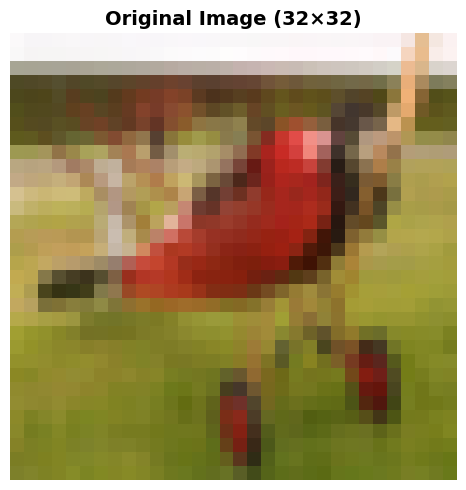


=== Actual Transform Pipeline ===
1. RandomHorizontalFlip(p=0.5): 50% probability horizontal flip
2. RandomCrop(32, padding=4): Pad with 4 pixels, then crop to 32×32
3. ToTensor(): Convert PIL image to tensor with range [0,1]
4. Normalize(): Apply CIFAR-10 normalization statistics
   - Mean: [0.4914, 0.4822, 0.4465]
   - Std: [0.2023, 0.1994, 0.201]

=== Multiple Random Transformations ===


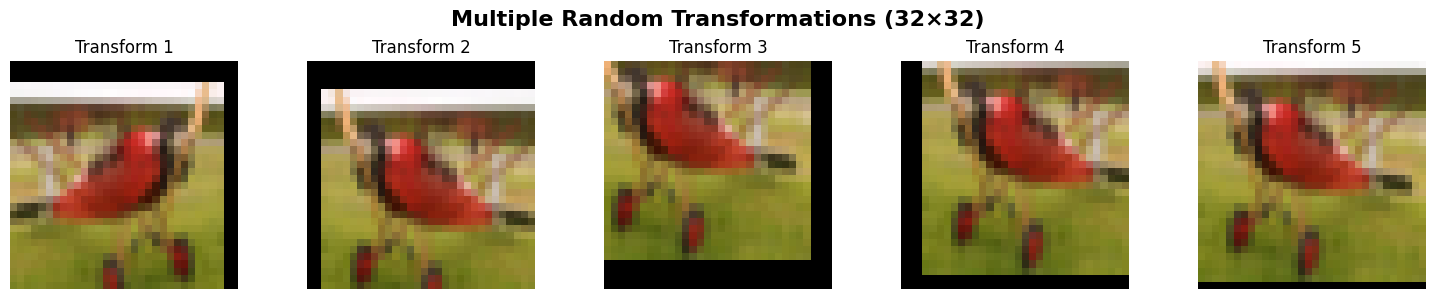


=== Tensor Statistics ===
Original tensor - Min: 0.016, Max: 1.000
Transformed tensor - Min: -2.429, Max: 2.715
Denormalized tensor - Min: -0.000, Max: 1.000


In [14]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the actual train_transform using torchvision
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),  # MODIFIED: Added random crop
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # MODIFIED: ImageNet standard normalization
])

# Transform for original image (no augmentation, just resize for comparison)
original_transform = transforms.Compose([
    # transforms.Resize((224, 224)),  # Standard ImageNet size
    transforms.ToTensor()
])

def denormalize_tensor(tensor, mean, std):
    """Denormalize a tensor for visualization"""
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    return tensor * std + mean

def tensor_to_numpy(tensor):
    """Convert tensor to numpy array for plotting"""
    return tensor.permute(1, 2, 0).clamp(0, 1).numpy()




# Load the image
img_path = './cifar10_images/train/airplane/35.png'  # Example CIFAR-10 image path




try:
    original_img = Image.open(img_path).convert('RGB')
    print(f"Successfully loaded image: {img_path}")
    print(f"Original image size: {original_img.size}")
except FileNotFoundError:
    # Create dummy image if file not found
    original_img = Image.new('RGB', (100, 100), color='red')
    print("Image file not found. Using dummy red square.")
    print(f"Dummy image size: {original_img.size}")

# Apply transforms
original_tensor = original_transform(original_img)
transformed_tensor = train_transform(original_img)

print(f"Original tensor shape: {original_tensor.shape}")
print(f"Transformed tensor shape: {transformed_tensor.shape}")
print(f"Transformed tensor range: [{transformed_tensor.min():.3f}, {transformed_tensor.max():.3f}]")

# Denormalize for visualization
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]
denormalized_tensor = denormalize_tensor(transformed_tensor.clone(), mean, std)

# Create comparison visualization
plt.figure(figsize=(12, 5))

# Left: Original image
# plt.subplot(1, 2, 1)
plt.imshow(tensor_to_numpy(original_tensor))
plt.title('Original Image (32×32)', fontsize=14, fontweight='bold')
plt.axis('off')

# Right: Transformed image
# plt.subplot(1, 2, 2)
# plt.imshow(tensor_to_numpy(denormalized_tensor))
# plt.title('Right: Transformed Image (32×32)', fontsize=14, fontweight='bold')
# plt.axis('off')

plt.tight_layout()
plt.show()

# Print transform details
print("\n=== Actual Transform Pipeline ===")
print("1. RandomHorizontalFlip(p=0.5): 50% probability horizontal flip")
print("2. RandomCrop(32, padding=4): Pad with 4 pixels, then crop to 32×32")
print("3. ToTensor(): Convert PIL image to tensor with range [0,1]")
print("4. Normalize(): Apply CIFAR-10 normalization statistics")
print(f"   - Mean: {mean}")
print(f"   - Std: {std}")

# Demonstrate multiple random transformations
print("\n=== Multiple Random Transformations ===")
plt.figure(figsize=(15, 3))

for i in range(5):
    # Apply transform multiple times to show randomness
    random_transformed = train_transform(original_img)
    random_denormalized = denormalize_tensor(random_transformed.clone(), mean, std)
    
    plt.subplot(1, 5, i+1)
    plt.imshow(tensor_to_numpy(random_denormalized))
    plt.title(f'Transform {i+1}')
    plt.axis('off')

plt.suptitle('Multiple Random Transformations (32×32)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Show tensor statistics
print(f"\n=== Tensor Statistics ===")
print(f"Original tensor - Min: {original_tensor.min():.3f}, Max: {original_tensor.max():.3f}")
print(f"Transformed tensor - Min: {transformed_tensor.min():.3f}, Max: {transformed_tensor.max():.3f}")
print(f"Denormalized tensor - Min: {denormalized_tensor.min():.3f}, Max: {denormalized_tensor.max():.3f}")


In [ ]:
import torch
import torch.nn as nn
import onnx
import netron

# 1. 모델 정의
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.mlp = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 8 * 8, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = self.mlp(x)
        return x

# 2. 모델 인스턴스 생성 및 더미 입력 준비
model = MyModel()
model.eval()
dummy_input = torch.randn(32, 3, 32, 32)  # 배치 32, 3채널, 32x32 이미지

# 3. ONNX로 내보내기
onnx_path = "mymodel.onnx"
torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    input_names=['input'],
    output_names=['output'],
    opset_version=11
)

print(f"ONNX 모델이 '{onnx_path}'로 저장되었습니다.")

# 4. Netron으로 시각화 (웹 브라우저에서 자동 오픈)
netron.start(onnx_path)


ONNX 모델이 'mymodel.onnx'로 저장되었습니다.
Serving 'mymodel.onnx' at http://localhost:8081


('localhost', 8081)

# cifar10 dataset classes each image plot

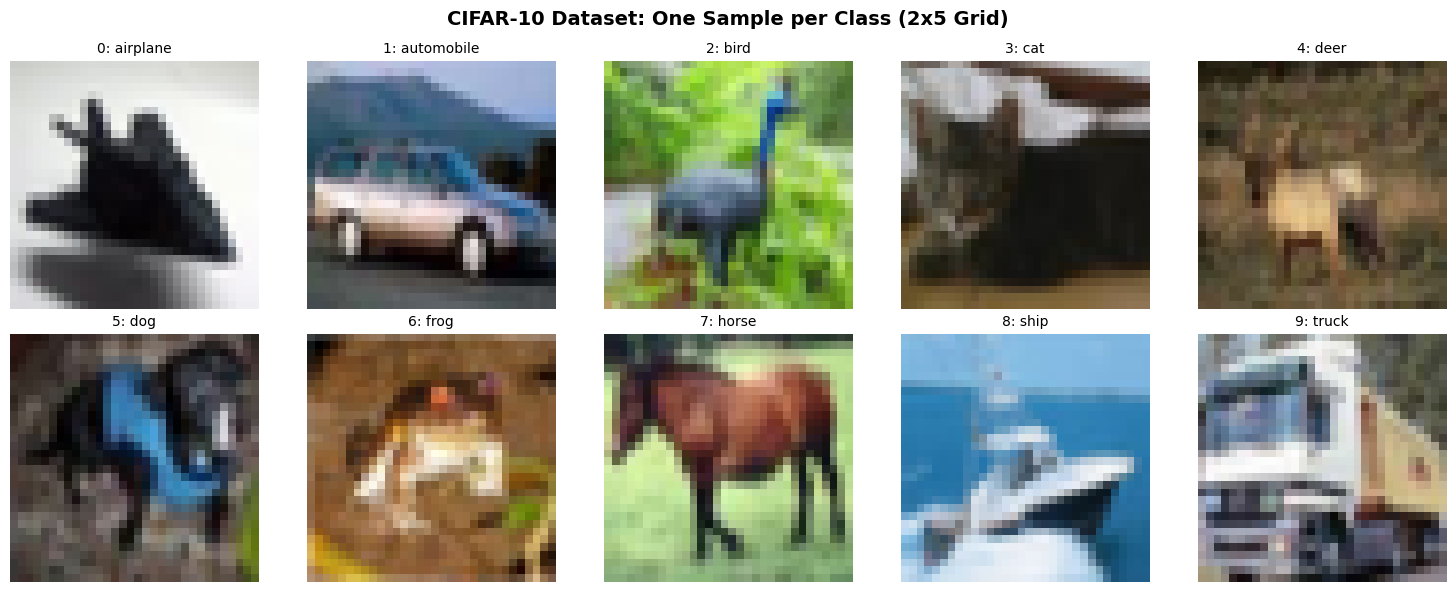

📊 CIFAR-10 Dataset Information:
총 훈련 이미지 수: 50,000개
이미지 크기: 32×32×3 (RGB)
클래스 수: 10개
클래스 목록: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 데이터셋 로드
transform = transforms.Compose([transforms.ToTensor()])
cifar10_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# 각 클래스별로 첫 번째 이미지 선정
class_images = {}
class_labels = cifar10_train.classes

for img, label in cifar10_train:
    if label not in class_images:
        class_images[label] = img
    if len(class_images) == 10:  # 10개 클래스 모두 수집되면 종료
        break

# 플롯용 데이터 준비
images_to_plot = [class_images[i] for i in range(10)]
labels_to_plot = [class_labels[i] for i in range(10)]

# 시각화 (2x5 grid로 변경)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flatten()):
    # 텐서를 numpy 배열로 변환 (CHW -> HWC)
    img = images_to_plot[i].permute(1, 2, 0).numpy()
    ax.imshow(img)
    ax.set_title(f'{i}: {labels_to_plot[i]}', fontsize=10)
    ax.axis('off')

plt.suptitle('CIFAR-10 Dataset: One Sample per Class (2x5 Grid)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 데이터셋 정보 출력
print("📊 CIFAR-10 Dataset Information:")
print(f"총 훈련 이미지 수: {len(cifar10_train):,}개")
print(f"이미지 크기: 32×32×3 (RGB)")
print(f"클래스 수: {len(class_labels)}개")
print(f"클래스 목록: {class_labels}")
